<a href="https://colab.research.google.com/github/imadjamil/coursera_capstone/blob/master/coursera_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursera capstone project
In this notebook, I will be working on the applied data science capstone project.

## Import section

In [58]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
#import ml_utils as mlu
#import config as cfg


print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imjamil","key":"7a7fc7ce6b90ff210a11de696b6f8888"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08            821  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           3803  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           2162  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59            225  
nehaprabhavalkar/india

In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 97% 225M/232M [00:02<00:00, 53.8MB/s]
100% 232M/232M [00:02<00:00, 83.3MB/s]


In [ ]:
!unzip us-accidents.zip -d /content/drive/My\ Drive/colab/training/coursera/9\_Capstone/data

Archive:  us-accidents.zip
  inflating: /content/drive/My Drive/colab/training/coursera/9_Capstone/data/US_Accidents_June20.csv  


## Data processing section

In [ ]:
df = pd.read_csv(r'/content/drive/My Drive/colab/training/coursera/9_Capstone/data/US_Accidents_June20.csv')
df.shape

(3513617, 49)

In [ ]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Missing values

In [ ]:
df.drop(['ID', 'Source', 'Timezone', 'Airport_Code', 'Zipcode', 'Weather_Timestamp', 'Country', 'State', 'Description'],
        axis=1,
        inplace=True)

In [ ]:
for col in df.columns:
  s = sum(df[col].isna())/df.shape[0]
  if s > 0.2:
    print('na in ' + col + ': ' + str(s))


na in TMC: 0.29451104090172603
na in End_Lat: 0.7054889590982739
na in End_Lng: 0.7054889590982739
na in Number: 0.6440269386219386
na in Wind_Chill(F): 0.5317167465890562
na in Precipitation(in): 0.5765779252548016


In [ ]:
df.drop(['TMC', 'End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)'], 
        axis=1, 
        inplace=True)


In [ ]:
for col in df.columns:
  s = sum(df[col].isna())/df.shape[0]
  if s > 0.01:
    print('na in ' + col + ': ' + str(s))

na in Temperature(F): 0.01870778744524517
na in Humidity(%): 0.01983340813754032
na in Pressure(in): 0.01590440847707647
na in Visibility(mi): 0.021589148731919274
na in Wind_Direction: 0.01675595262659533
na in Wind_Speed(mph): 0.12938490450154358
na in Weather_Condition: 0.021669407906439432


In [ ]:
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(),inplace=True)
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(),inplace=True)
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(),inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(),inplace=True)
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(),inplace=True)

In [ ]:
df.sort_values(['Start_Time', 'County', 'City'],inplace=True)
df['Weather_Condition'].fillna(method='ffill',inplace=True) 
df['Wind_Direction'].fillna(method='ffill',inplace=True)
df['Astronomical_Twilight'].fillna(method='ffill',inplace=True)
df['Nautical_Twilight'].fillna(method='ffill',inplace=True)
df['Civil_Twilight'].fillna(method='ffill',inplace=True)
df['Sunrise_Sunset'].fillna(method='ffill',inplace=True)

In [ ]:
for col in df.columns:
  s = sum(df[col].isna())/df.shape[0]
  if s > 0:
    print('na in ' + col + ': ' + str(s))

na in City: 3.187598420658825e-05


In [ ]:
df.shape

(3513617, 34)

In [ ]:
df.dropna(axis=0, 
          inplace=True)

In [ ]:
df.shape

(3513505, 34)

Date

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], infer_datetime_format=True)

In [ ]:
df['year'] = df['Start_Time'].dt.year
df['month'] = df['Start_Time'].dt.month
df['day'] = df['Start_Time'].dt.day
df['hour'] = df['Start_Time'].dt.hour
df['weekday'] = df['Start_Time'].dt.weekday
df.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)

Integer Encoding

In [ ]:
df.select_dtypes(include=['object']).dtypes

Street                   object
Side                     object
City                     object
County                   object
Wind_Direction           object
Weather_Condition        object
Sunrise_Sunset           object
Civil_Twilight           object
Nautical_Twilight        object
Astronomical_Twilight    object
dtype: object

In [7]:
## Save cleaned data

In [ ]:
with open(r'/content/drive/My Drive/colab/training/coursera/9_Capstone/data/clean.pickle','wb') as f:
  pickle.dump(df, f)

##Load cleaned data

In [70]:
with open(r'/content/drive/My Drive/colab/training/coursera/9_Capstone/data/clean.pickle','rb') as f:
  df = pickle.load(f)

In [71]:
df = df.sample(frac=0.1)

target='Severity'
features=['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', \
          'Visibility(mi)', 'Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Weather_Condition', \
          'Crossing', 'Junction', 'Traffic_Signal', \
          'year', 'month', 'day', 'hour', 'weekday']

df=df[features+[target]]


#print(df.info())

print(df[target].value_counts())

2    237191
3     99887
4     11390
1      2882
Name: Severity, dtype: int64


### Down-sampling

In [72]:
# Separate majority and minority classes

df_minority = df[ df[target]==1 ]
 
# Downsample majority class
df_majority_downsampled_2 = resample(df[ df[target]==2 ], 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results

df_majority_downsampled_3 = resample(df[ df[target]==3 ], 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results

df_majority_downsampled_4 = resample(df[ df[target]==4 ], 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled_2, df_majority_downsampled_3, df_majority_downsampled_4, df_minority])
 
# Display new class counts
print(df_downsampled[target].value_counts())

df = df_downsampled

4    2882
3    2882
2    2882
1    2882
Name: Severity, dtype: int64


In [7]:
obj_cols = ['Side', 'Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Weather_Condition'] 
df[obj_cols].shape

(8784, 5)

In [8]:
df_dummies = pd.get_dummies(df[obj_cols])

In [ ]:
df.drop(obj_cols, axis=1, inplace=True)
df = df.join(df_dummies)

df.info()

In [15]:
df.shape

(1124, 21)

# Model

## Definitions

In [64]:
def print_score(y_test, predictions):
  accuracy_score(y_test, predictions)

  print("Randon forest model, accuracy_score:",accuracy_score(y_test, predictions))
  print('\n')
  print('Confusion matrix')
  print(confusion_matrix(y_test,predictions))
  print('\n')
  print('Classificaiton report')
  print(classification_report(y_test,predictions))

def k_top_features_importances_list(forest, X, k):
  importances = pd.Series(forest.feature_importances_,index=X.columns).sort_values(ascending=False)
  std = np.std([pd.Series(tree.feature_importances_,index=X.columns).sort_values(ascending=False) for tree in forest.estimators_],
              axis=0)
  
  indices = np.argsort(importances)[::-1][:k]

  # Print the feature ranking
  print("Feature ranking:")

  
  #for f in range(X.shape[1]):
  for f in range(k):

      print(str(f+1) + '. ' + importances.index[indices[f]] + ": feature %d (%f)" % (indices[f], importances[indices[f]]))

  # Plot the impurity-based feature importances of the forest
  plt.figure()
  plt.title("Feature importances")
  plt.bar(range(k), importances[indices],
          color="r", yerr=std[indices], align="center")
  plt.xticks(range(k), indices)
  plt.xlim([-1, k])
  plt.show()

def k_top_features_bar(forest, X, k):
  feature_i = pd.Series(forest.feature_importances_,index=X.columns).sort_values(ascending=False)

  sns.barplot(x=feature_i[:k], y=feature_i.index[:k])
  plt.xlabel('Feature Importance Score')
  plt.title("Top features")
  plt.legend()
  plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.patches import Patch
import itertools
from collections import deque

def nclass_classification_mosaic_plot(n_classes, results, ax=None):
    """
    build a mosaic plot from the results of a classification
    
    parameters:
    n_classes: number of classes
    results: results of the prediction in form of an array of arrays
    
    In case of 3 classes the prdiction could look like
    [[10, 2, 4],
     [1, 12, 3],
     [2, 2, 9]
    ]
    where there is one array for each class and each array holds the
    predictions for each class [class 1, class 2, class 3].

    usagle example:
    n_classes = 4 # number of classes
    results = [
        [50, 4, 1, 2], # predictions for class 1
        [1, 40, 4, 3], # predictions for class 2
        [3, 2, 30, 1], # predictions for class 3
        [1, 3, 1, 60], # predictions for class 4
    ]
    nclass_classification_mosaic_plot(ax, n_classes, results)
    
    This is just a prototype including colors for 6 classes.
    """
    class_lists = [range(n_classes)]*2
    mosaic_tuples = tuple(itertools.product(*class_lists))
    
    res_list = results[0]
    for i, l in enumerate(results):
        if i == 0:
            pass
        else:
            tmp = deque(l)
            tmp.rotate(-i)
            res_list.extend(tmp)
    data = {t:res_list[i] for i,t in enumerate(mosaic_tuples)}

    if ax == None:
      fig, ax = plt.subplots(figsize=(11, 10))
      plt.rcParams.update({'font.size': 16})

    font_color = '#2c3e50'
    pallet = [
        '#6a89cc', 
        '#4a69bd', 
        '#1e3799', 
        '#0c2461',
        '#82ccdd',
        '#60a3bc',
    ]
    colors = deque(pallet[:n_classes])
    all_colors = []
    for i in range(n_classes):
        if i > 0:
            colors.rotate(-1)
        all_colors.extend(colors)

    props = {(str(a), str(b)):{'color':all_colors[i]} for i,(a, b) in enumerate(mosaic_tuples)}

    labelizer = lambda k: ''

    p = mosaic(data, labelizer=labelizer, properties=props, ax=ax)

    title_font_dict = {
        'fontsize': 20,
        'color' : font_color,
    }
    axis_label_font_dict = {
        'fontsize': 16,
        'color' : font_color,
    }

    ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
    ax.axes.yaxis.set_ticks([])
    ax.tick_params(axis='x', which='major', labelsize=14)

    ax.set_title('Classification Report', fontdict=title_font_dict, pad=25)
    ax.set_xlabel('Observed Class', fontdict=axis_label_font_dict, labelpad=10)
    ax.set_ylabel('Predicted Class', fontdict=axis_label_font_dict, labelpad=35)

    legend_elements = [Patch(facecolor=all_colors[i], label='Class {}'.format(i)) for i in range(n_classes)]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1,1.018), fontsize=16, loc='upper left')

    if ax == None:
      plt.tight_layout()
      plt.show()

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          score_str=None,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          elapsed_time=None,
                          ax=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    if ax == None:
      fig, ax = plt.subplots(figsize=figsize)
      
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories, ax=ax)

    if xyplotlabels:
        ax.set_ylabel('True label')
        ax.set_xlabel('Predicted label' + stats_text)
    else:
        ax.set_xlabel(stats_text)

    if score_str:
      extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0, alpha=0.2)
      ax.legend([extra], [score_str], loc='upper center')
    
    if title:
      if elapsed_time:
        title = title + '\n Eval in {:.2f} sec'.format(elapsed_time)
      ax.set_title(title)

def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)

In [11]:
y=df[target]
X=df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

mdl_rf=RandomForestClassifier(n_estimators=250)

mdl_rf.fit(X_train,y_train)
predictions=mdl_rf.predict(X_test)

print_score(y_test, predictions)

In [ ]:
k_top_features_importances_list(mdl_rf, X, 20)

##SVM

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

predictions=clf.predict(X_test)

print_score(y_test, predictions)

## Pipeline

In [73]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

X = df[features]
y = df[target]

cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[X.dtypes == 'float64']

categories = [
    X[column].unique() for column in X[cat_cols]]

for cat in categories:
    cat[cat == None] = 'missing'  # noqa

cat_proc_nlin = make_pipeline(
    SimpleImputer(missing_values=None, strategy='constant',
                  fill_value='missing'),
    OrdinalEncoder(categories=categories)
    )

num_proc_nlin = make_pipeline(SimpleImputer(strategy='mean'))

cat_proc_lin = make_pipeline(
    SimpleImputer(missing_values=None,
                  strategy='constant',
                  fill_value='missing'),
    OneHotEncoder(categories=categories)
)

num_proc_lin = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

# transformation to use for non-linear estimators
processor_nlin = make_column_transformer(
    (cat_proc_nlin, cat_cols),
    (num_proc_nlin, num_cols),
    remainder='passthrough')

# transformation to use for linear estimators
processor_lin = make_column_transformer(
    (cat_proc_lin, cat_cols),
    (num_proc_lin, num_cols),
    remainder='passthrough')

In [74]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingClassifier


rf_pipeline = make_pipeline(processor_lin,
                            RandomForestClassifier(random_state=50))

svm_rbf_pipeline = make_pipeline(
    processor_lin,
    SVC(gamma=2, C=1))

svm_lin_pipeline = make_pipeline(
    processor_lin,
    SVC(kernel='linear', C=0.025))

mlp_pipeline = make_pipeline(
    processor_lin,
    MLPClassifier(alpha=0.01, max_iter=1000, activation='logistic'))

gradient_pipeline = make_pipeline(
    processor_lin,
    GradientBoostingClassifier(random_state=50))

knn_pipeline = make_pipeline(
    processor_lin,
    KNeighborsClassifier(5))

naive_pipeline = make_pipeline(
    processor_lin,
    GaussianNB(5))

gaussian_pipeline = make_pipeline(
    processor_lin,
    GaussianProcessClassifier())

adaboost_pipeline = make_pipeline(processor_lin,
                                  AdaBoostClassifier())

lasso_pipeline = make_pipeline(processor_lin,
                               LassoCV())

estimators = [('Random Forest', rf_pipeline),
              #('RBF SVM', svm_rbf_pipeline),
              ('Linear SVM', svm_lin_pipeline),
              ('MLP', mlp_pipeline),
              ('Gradient Boosting', gradient_pipeline),
              ('KNN', knn_pipeline)]

stacking_classifier = StackingClassifier(estimators=estimators)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


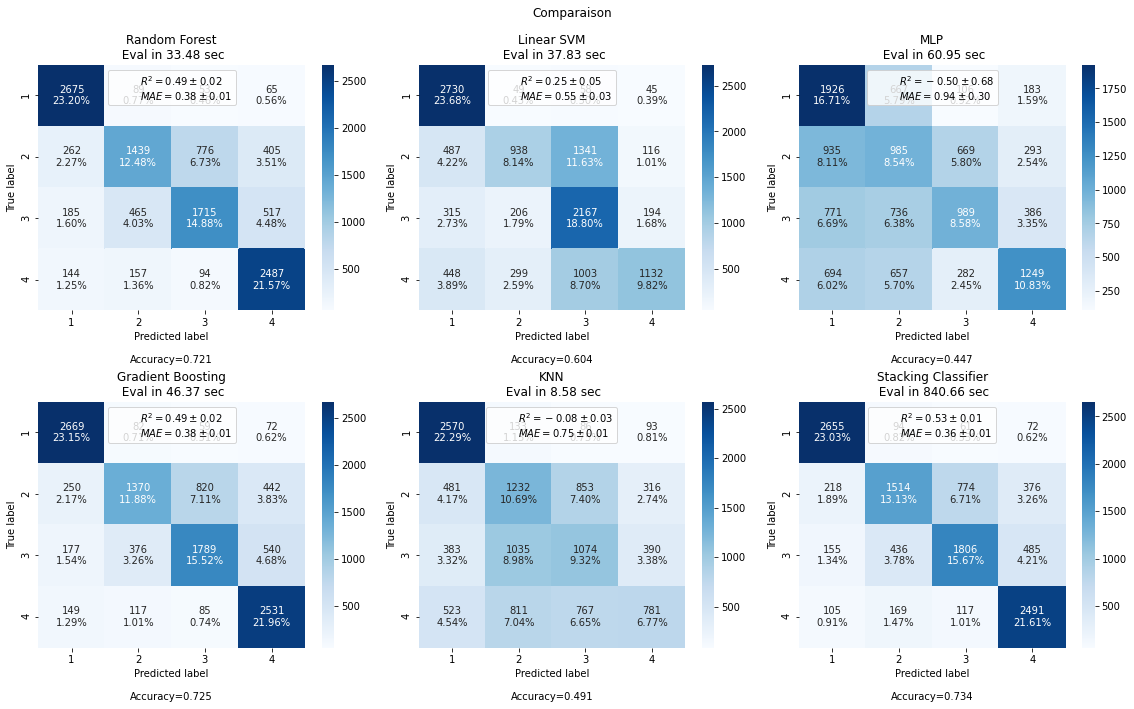

In [75]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix



results_list = []
plot_reg = False
plot_cf = True

categories = ['1', '2', '3', '4']

if plot_reg:
  fig, axs = plt.subplots(2, 2, figsize=(9, 7))
elif plot_cf:
  fig, axs = plt.subplots(2, 3, figsize=(16, 10))
  axs = np.ravel(axs)



for ax, (name, est) in zip(axs, estimators + [('Stacking Classifier',
                                               stacking_classifier)]):
#for ax, (name, est) in zip(axs, estimators):
    
    start_time = time.time()

    score = cross_validate(est, X, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    
    score_str = (r'$R^2={:.2f} \pm {:.2f}$' + '\n' \
                 + r'$MAE={:.2f} \pm {:.2f}$'
                 ).format(np.mean(score['test_r2']),
                  np.std(score['test_r2']),
                  -np.mean(score['test_neg_mean_absolute_error']),
                  np.std(score['test_neg_mean_absolute_error']))
    
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)

    cf_matrix = confusion_matrix(y, y_pred)

    results_list.append(cf_matrix)

    if plot_cf:
      make_confusion_matrix(cf_matrix, 
                            title=name, 
                            categories=categories, 
                            score_str=score_str,
                            elapsed_time=elapsed_time,
                            ax=ax)
      #sns.heatmap(cf_matrix/np.sum(cf_matrix), 
                  #annot=True, 
                  #fmt='.2%', 
                  #cmap='Blues',
                  #ax=ax)      

    if plot_reg:
      plot_regression_results(
          ax, y, y_pred,
          name,
          score_str,
          elapsed_time)

plt.suptitle('Comparaison')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [72]:
results_list

[array([[   0,   28,    2,    0],
        [   0, 2169,  187,    2],
        [   0,  781,  244,    0],
        [   0,   76,   25,    0]]), array([[   0,   30,    0,    0],
        [   0, 2358,    0,    0],
        [   0, 1025,    0,    0],
        [   0,  101,    0,    0]]), array([[   0,   19,   11,    0],
        [   0, 1375,  983,    0],
        [   0,  454,  569,    2],
        [   0,   48,   52,    1]]), array([[   6,   21,    2,    1],
        [   8, 2117,  222,   11],
        [   1,  699,  318,    7],
        [   1,   74,   21,    5]])]

In [45]:
results_list[0].tolist()


[[3, 19, 4, 0], [1, 2147, 178, 0], [0, 778, 275, 1], [0, 75, 30, 3]]

In [57]:
categories = ['1', '2', '3', '4']

make_confusion_matrix(results_list[3], 
                            title=Test, 
                            categories=categories, 
                            score_str='score_str,
                            elapsed_time='11 sec',
                            ax=ax)

SyntaxError: ignored

In [33]:
df['Severity'].value_counts()/df.shape[0]

2    0.661924
3    0.299943
4    0.030734
1    0.007399
Name: Severity, dtype: float64

In [35]:
cross_validate(estimators[0][1],X,y,n_jobs=-1)

{'fit_time': array([2.34639668, 2.32558966, 2.33574605, 2.35950708, 1.65187073]),
 'score_time': array([0.05606222, 0.05687261, 0.05765533, 0.05832124, 0.03788304]),
 'test_score': array([0.69843528, 0.69559033, 0.68705548, 0.66714083, 0.70655271])}

In [36]:
cross_validate(estimators[1][1],X,y,n_jobs=-1)

{'fit_time': array([0.53650498, 0.55896091, 0.53564763, 0.53593159, 0.39940739]),
 'score_time': array([0.05099106, 0.06813836, 0.04837584, 0.05597663, 0.02949643]),
 'test_score': array([0.42532006, 0.59317212, 0.49928876, 0.3940256 , 0.42165242])}

In [37]:
cross_validate(estimators[2][1],X,y,n_jobs=-1)

{'fit_time': array([5.45198727, 5.5241549 , 5.50333381, 5.55890322, 3.85578609]),
 'score_time': array([0.02771544, 0.0288403 , 0.02768922, 0.02893138, 0.02120686]),
 'test_score': array([0.68705548, 0.7197724 , 0.70697013, 0.6799431 , 0.71367521])}

In [32]:
df[target].value_counts()

3    1475
2    1475
1    1475
4    1475
Name: Severity, dtype: int64